In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

# data_dir = '/Users/SY/Desktop/obic/data/'
data_dir = '/Users/dengdingshan/Documents/data/obic/'

In [2]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_2mass_new2.csv')

###########

#starcatlog_fram = starcatlog_fram.ix[:,:517]
#print(starcatalog_fram)

In [3]:
#read parsec
parsec_fram = pd.read_csv(data_dir + 'parsec_jhkw.csv')

############

#print(parsec_fram.values)

In [4]:
### variables

teff = 'TEFF'

color1 = 'Jmag'
color2 = 'Hmag'
err_teff = 'ERR_TEFF'

err_c1 = 'e_' + color1
#'e_' + color1
#color1 + 'err' 
#color1 + 'err'
#ERR_' + color1
#'e_' + color1

err_c2 = 'e_' + color2
#'ERR_' + color2
#'e_' + color2

In [24]:
### figures & Savename
cc1 = 'J'
cc2 = 'H'

save = data_dir + 'pictures/'
# save = '/Users/SY/Desktop/obic/picture/'

i = datetime.datetime.now()
date_now = "%s_%s_%s_" % (i.year, i.month, i.day) 
ylabel = '$%s - %s$'%(cc1,cc2) 
savename1 = save + date_now + cc1 + cc2 + 'no'+'.png'
savename2 = save + date_now + cc1 + '_HR_' + cc2 +'.png'
savename3 = save + date_now + 'errteff.png'

In [25]:
### Elective CHOICE

########### I.
#change logTeff into Teff.

# def tenn(x):
#     y=10 ** x
#     return y

# Teff_tbl = starcatalog['logTeff'].apply(tenn)
###########

########### II.
#add [Teff] into DATAFRAME

#data_fram = starcatalog_fram[['TEFF_1','ERR_TEFF_1','Jmag_1','e_Jmag_1','Hmag_1','e_Hmag_1']]
#print(data_fram)
###########

########### III.
# fill the NaN blocks with 0

starcatalog_fram_fil = starcatalog_fram.fillna(0)

#print(starcatalog_fram_fil['LOGG'])
############


In [26]:
starcatalog_fram_fil.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', '2MASS',
       'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag',
       'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X',
       'MeasureJD', 'angDist'],
      dtype='object')

In [27]:
### we just need the mainsquence (dwarf stars)

# judge logg >3.7

# starcatalog_fram_fil = starcatalog_fram_fil[(starcatalog_fram_fil['LOGG']>3.0)]
# parsec_fram = parsec_fram[(parsec_fram['logg']>3.0)]                                            

In [28]:
### get the good stars

# judge  data
starcatalog_fram_fil=starcatalog_fram_fil[((starcatalog_fram_fil[err_c1] != 0) \
                                          & (starcatalog_fram_fil[err_c2] != 0)\
                                          & (starcatalog_fram_fil[err_c1] != -99) \
                                          & (starcatalog_fram_fil[err_c2] != -99))\
                                         & ((starcatalog_fram_fil[color1] != 0)\
                                           & (starcatalog_fram_fil[color2] != 0)\
                                           & (starcatalog_fram_fil[color1] != -99) \
                                           & (starcatalog_fram_fil[color2] != -99))\
                                         &((starcatalog_fram_fil[err_c1] <=0.03)\
                                          & (starcatalog_fram_fil[err_c2] <=0.03))]
### additional judgement

# starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[err_c1] <=0.2)\
#                                            &(starcatalog_fram_fil[err_c2] <=0.05)]

print(starcatalog_fram_fil.iloc[:,0].size)

137601


In [29]:
### draw the png of errTeff 

# plt.figure(3)
# plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
# plt.ylabel('$σ_\mathrm{Teff}$',fontsize=14)
# plt.scatter(starcatalog_fram_fil[teff],starcatalog_fram_fil[err_teff],\
#             c='steelblue',s=8, edgecolors='None',alpha=0.2,label='$σ_\mathrm{Teff}$(LAMOST)')
# plt.legend(loc='lower right')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig(savename3,dpi=200)  
# plt.show()

### 

In [30]:
# cut source g-r:0.440
origin = starcatalog_fram_fil
# starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2]>= -0.440)\
#                                          & (starcatalog_fram_fil[color1]>=12)]

In [31]:
#filt the good one
#apogee_tbl_fil = apogee_tbl[np.argwhere(np.logical_and(apogee_tbl['teff'] > 0, apogee_tbl['logg'] > -3))]
#apogee_tbl_fil = apogee_tbl_fil[np.argwhere(np.logical_and(apogee_tbl_fil['j'].flatten() > -1, \
#                                                           apogee_tbl_fil['h'].flatten() > -1))]
#USE goodOB 


starcatalog_fram_fil=starcatalog_fram_fil[(((starcatalog_fram_fil[err_teff] != 0 )\
                                          & (starcatalog_fram_fil[teff]>= 9480))\
                                          #& (starcatalog_fram_fil[teff]<= 16000))
                                          & (((starcatalog_fram_fil[err_teff]< 630)\
                                          &(starcatalog_fram_fil[teff]> 9000))\
                                          |((starcatalog_fram_fil[err_teff]< 500)\
                                          & (starcatalog_fram_fil[teff]<= 9000))))]
print(np.max(starcatalog_fram_fil[teff]))

25784.666


In [32]:
# Determine the input numbers.

# Bin width, usually 50 (for more scatter, try 1000 or other figures)
#bin_width = 1000
# Ratio of the bluest edge, usually 5%
rat = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 50

In [33]:
# input the data of Bessell. M.S. & Brett. J.M. 1988
# BBFrame is the dataframe of the ic data 

BBFrame=pd.DataFrame({'J-H':[-0.09,-0.08,-0.07,-0.06,-0.05,-0.03,-0.03,-0.01,0.0,0.02,0.06],\
                      'Teff':[22300,19000,17200,15400,14100,13000,11800,10700,9480,8810,8160]})


In [34]:
# parsec point
parsecframe = parsec_fram[((parsec_fram['Age'] == 3980000)\
                           &(parsec_fram['logTe'] <= 4.361)\
                           &(parsec_fram['logTe'] >=3.98))]
parsec_teff =10**parsecframe['logTe'] 
parsec_color = parsecframe[color1] - parsecframe[color2]
#print(parsecframe.values)
                                         

In [35]:
# SFD point
SFDframe = pd.read_csv('SFD_teffJH.csv')
SFD_teff = SFDframe['TEFF']
SFD_ic = SFDframe['J-H']


In [36]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.


#teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
#bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

#teff_start = min(starcatalog_fram_fil[teff])-min(starcatalog_fram_fil[teff])%(bin_width / 2)

teff_start= 9480

#bin_number = math.ceil((max(starcatalog_fram_fil[teff])-teff_start) / bin_width)


In [37]:
#filt BBFrame
BBFrame_fil=BBFrame[BBFrame['Teff'] >= teff_start]

In [38]:
def data(teff_start,ratio,low_crit):

    start_time = time.time()
    int_teff = []
    int_color = []
    bin_int_color = []
    data_final = pd.DataFrame(columns=[teff,color1,color2])
    teff_judge = teff_start
    while teff_judge < np.max(starcatalog_fram_fil[teff]) - 1000:

        if teff_judge <9000:
            bin_width = 100
        else:
            bin_width = 630

        bin_tbl =starcatalog_fram_fil[np.logical_and(starcatalog_fram_fil[teff] > teff_judge, \
                                                starcatalog_fram_fil[teff] < teff_judge+bin_width)]

        #print(teff_judge)
       
        
        if len(bin_tbl) < low_crit:
            teff_judge = teff_judge+bin_width
            continue
            
        source_num = 0
        #print(len(bin_tbl))

        while source_num != len(bin_tbl):
            source_num = len(bin_tbl)
        #             bin_mean = np.mean(bin_tbl[color1]-bin_tbl[color2])
        #             bin_sigma = np.std(bin_tbl[color1]-bin_tbl[color2])
        #             bin_tbl = bin_tbl[np.logical_and(bin_tbl[color1]-bin_tbl[color2] < bin_mean+3*bin_sigma, \
        #                                       bin_tbl[color1]-bin_tbl[color2] > bin_mean-3*bin_sigma)]


        bin_final = bin_tbl[[teff,color1,color2]]
        data_final = data_final.append(bin_final)
        #print(len(bin_tbl))

        int_teff.append(float(teff_judge+bin_width/2))
        

        color5 = np.sort(bin_tbl[color1]-bin_tbl[color2])[:math.ceil(len(bin_tbl)*ratio/100)]

        if len(color5) != 0:
            bin_mean = np.median(color5)
            bin_sigma = np.std(color5)
            bin_int_color = color5\
            [((color5<= bin_mean+3*bin_sigma)\
            & (color5>= bin_mean-3*bin_sigma))]

            int_color.append(np.median(bin_int_color))
            
        teff_judge = teff_judge+bin_width
#    print(teff_judge)
    print(time.time() - start_time)
    print(int_teff,int_color)
#     print(bin_mean)
#     print(data_final.iloc[:,0].size)
    return int_teff,int_color,data_final

In [39]:
# fitting curve
int_teff,int_color,data_final = data(teff_start,rat,low_crit)
fc = np.polyfit(int_teff, int_color, 3)#用3次多项式拟合
fitcurve = np.poly1d(fc)
print(fitcurve) #在屏幕上打印拟合多项式
colorvals=fitcurve(int_teff)
print(len(colorvals),len(int_teff))
print(len(data_final[teff].values))

0.08593606948852539
[9795.0, 10425.0, 11055.0, 11685.0, 12315.0, 12945.0, 13575.0, 14205.0, 14835.0, 15465.0, 16095.0, 16725.0, 17355.0, 17985.0, 18615.0, 19245.0, 19875.0, 20505.0, 21135.0, 21765.0, 22395.0, 23025.0, 23655.0, 24915.0] [-0.031000000000000583, -0.04400000000000048, -0.04800000000000004, -0.04599999999999849, -0.04899999999999949, -0.045999999999999375, -0.03449999999999953, -0.049999999999998934, -0.054999999999999716, -0.04150000000000009, -0.04549999999999965, -0.004999999999999005, -0.018000000000000682, 0.011499999999999844, -0.0600000000000005, -0.03399999999999892, -0.08700000000000152, -0.03500000000000103, -0.0259999999999998, -0.005999999999998451, 0.012500000000000178, 0.011999999999998678, -0.04149999999999743, -0.03199999999999825]
            3             2
-4.792e-14 x + 2.563e-09 x - 4.191e-05 x + 0.1718
24 24
39012


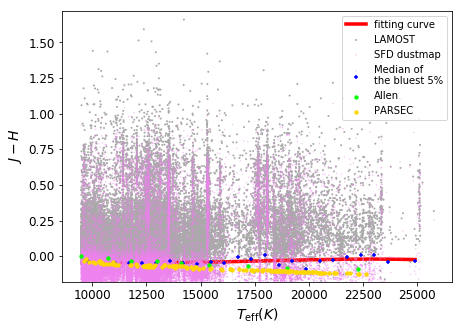

In [54]:
#PLT
plt.figure(1,figsize=(7, 5))  
plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
plt.ylabel(ylabel,fontsize=14)
#plt.ylim(-4,9)

# the data we use
plt.scatter(starcatalog_fram_fil[teff], starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2],\
            c='darkgray',s=4, edgecolors='None',label='LAMOST')

# ic from SFD dustmap
plt.scatter(SFD_teff,SFD_ic,alpha=0.5,edgecolors='None',c='violet',s=2,label='SFD dustmap',zorder=2)

# ic plot from blue edge
plt.plot(int_teff, colorvals, c='r',linewidth = 3.5,label='fitting curve',zorder=1)

# ic from blue edge
plt.scatter(int_teff, int_color, edgecolors='None',c='b', marker = '+',s=11,label='Median of\nthe bluest 5%',zorder=2)

# ic from BB's work
plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='lime',s=11,label='Allen',zorder=2)

# ic from parsec
plt.scatter(parsec_teff,parsec_color,c='gold',s=11,label='PARSEC',zorder=2)

### Draw the plot

# plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel(ylabel)
#plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='#FF6666',s=11,label='Allen')

plt.legend(loc='upper right')
#new_ticks = np.linspace(-1,2,7)
#plt.yticks(new_ticks)
plt.ylim(np.min(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]),\
        np.max(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(savename1,dpi=200)    
plt.show()

5
0.06457924842834473
[9795.0, 10425.0, 11055.0, 11685.0, 12315.0, 12945.0, 13575.0, 14205.0, 14835.0, 15465.0, 16095.0, 16725.0, 17355.0, 17985.0, 18615.0, 19245.0, 19875.0, 20505.0, 21135.0, 21765.0, 22395.0, 23025.0, 23655.0, 24915.0] [-0.031000000000000583, -0.04400000000000048, -0.04800000000000004, -0.04599999999999849, -0.04899999999999949, -0.045999999999999375, -0.03449999999999953, -0.049999999999998934, -0.054999999999999716, -0.04150000000000009, -0.04549999999999965, -0.004999999999999005, -0.018000000000000682, 0.011499999999999844, -0.0600000000000005, -0.03399999999999892, -0.08700000000000152, -0.03500000000000103, -0.0259999999999998, -0.005999999999998451, 0.012500000000000178, 0.011999999999998678, -0.04149999999999743, -0.03199999999999825]


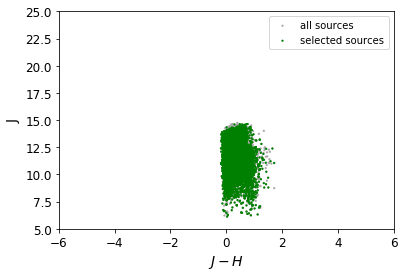

In [41]:
plt.figure(2)
plt.xlabel(ylabel,fontsize=14); plt.ylabel(cc1,fontsize=14)
plt.xlim(-6,6)
plt.ylim(5,25)
# for rat in ratio:
print(rat)
int_teff,int_color,data_final = data(teff_start,rat,low_crit)

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(origin[color1]-origin[color2], origin[color1],\
            c= 'darkgray',s=5,edgecolors = 'None',alpha = 1,cmap=cm,label='all sources')
plt.scatter(data_final[color1]-data_final[color2], data_final[color1],\
             c='g',s=5, edgecolors='None', alpha=1,label='selected sources')
#plt.colorbar(sc)
plt.legend(loc='upper right')
# new_ticks = np.linspace(-2,3,18)
# plt.xticks(new_ticks)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(savename2,dpi=200)    
plt.show()

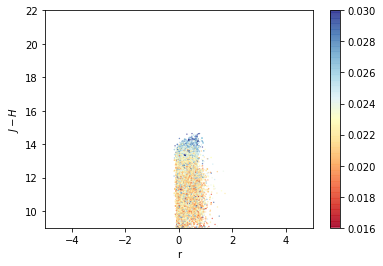

In [43]:
# 赫罗图
plt.xlabel('r')
plt.ylabel(ylabel)

cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2],starcatalog_fram_fil[color1],\
            c = starcatalog_fram_fil[err_c1],s=2,edgecolors = 'None',alpha = 0.7,cmap=cm)

plt.colorbar(sc)

plt.xlim(-5,5)
plt.ylim(9,22)
plt.savefig(save+'HR.png',dpi=200)
plt.show()

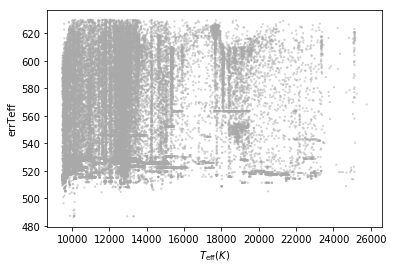

In [44]:
plt.figure(3)
plt.xlabel('$T_\mathrm{eff}(K)$')
plt.ylabel('errTeff')
plt.scatter(starcatalog_fram_fil[teff],starcatalog_fram_fil[err_teff],\
            c='darkgray',s=5, edgecolors='None', alpha=0.5)
plt.show()